# Imports

In [2]:
import importlib
import functions as f  # Our defined functions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np
from tqdm.notebook import tqdm
import os
import math
import time

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

importlib.reload(f)

GRatio = (1 + 5 ** .5) / 2

WIDTH = .5
DASH = (10, 10)


# Solving models

Model verified.
Writing model to file models/SIRS_vars.json.
File name already exists.
Overwriting file.


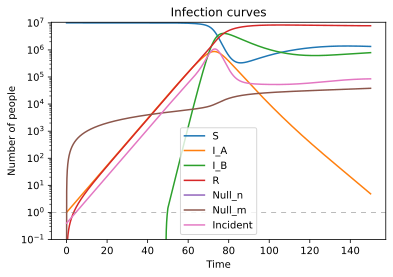

Pop variation: -23342

Computation of R0
Model verified.
Writing model to file models/SIRS_vars.json.
File name already exists.
Overwriting file.

Creating new model!
New model created in 0.0e+00 seconds.

Véfication faite, les deux modèles sont identiques.
R0 computation done

{'Rt(S,I_A)': 1.997995852338581, 'Rt(S,I_B)': 0.0}
Model verified.
Writing model to file models/SIRS_deaths.json.
File name already exists.
Overwriting file.


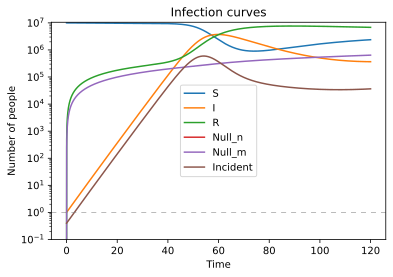

Pop variation: -402825

Computation of R0
Model verified.
Writing model to file models/SIRS_deaths.json.
File name already exists.
Overwriting file.

Creating new model!
New model created in 0.0e+00 seconds.

Véfication faite, les deux modèles sont identiques.
R0 computation done

{'Rt(S,I)': 3.9072711437888414}
Model verified.
Writing model to file models/SIR_test3.json.
File name already exists.
Overwriting file.


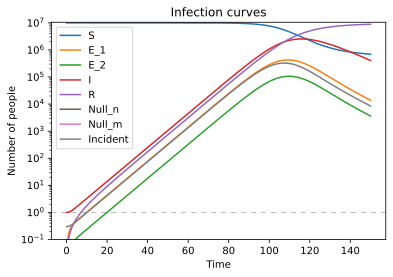

Pop variation: -0

Computation of R0
Model verified.
Writing model to file models/SIR_test3.json.
File name already exists.
Overwriting file.

Creating new model!
New model created in 0.0e+00 seconds.

Véfication faite, les deux modèles sont identiques.
R0 computation done

{'Rt(S,E_1)': 1.999876593531904, 'Rt(S,I)': 0.999938296765952}


In [59]:
importlib.reload(f)

for modelName in ['SIRS_vars', 'SIRS_deaths', 'SIR_test3']:

    t_final = {
        'SIRS_vars': 150,
        'SIRS_deaths': 120,
        'SIR_test3': 150
    }
    model = f.loadModel(modelName)
    solution, t_span = f.solve(model, (0, t_final[modelName]), 100)

    # SIRS_deaths2 = f.mod(SIRS_deaths)
    # solution2, t_span2 = f.solve(SIRS_deaths2, (0, 200), 100)

    fig = plt.figure()
    f.plotCurves(t_span,
                np.transpose(solution),
                toPlot=list(range(solution.shape[1])),
                labels=f.getCompartments(model))
    plt.plot(t_span, f.infCurve(model, solution, t_span), label='Incident')
    plt.ylim(bottom=.1)
    plt.legend(loc='best')
    plt.axhline(y=1, linestyle='--', color='grey', linewidth=WIDTH, dashes=DASH)
    plt.yscale('log')
    plt.show()

    popChange = f.getPopChange(model, solution)
    print(f"Pop variation: {popChange:.0f}")

    f.mod(model)

    model, modelMod, _, r0 = f.computeR0(
        modelName, (0, 300), printInit=False, printWarnings=False,
        scaledInfs=False)

    print(r0)


# $\mathcal{R}_t$ curves

Initializing with values {'S': 9691544.09, 'I_A': 150996.14, 'I_B': 1174.49, 'R': 156137.79, 'Null_n': -6001.0, 'Null_m': 6148.49}.



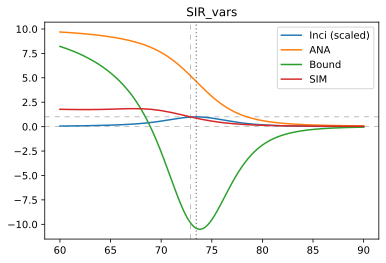

In [4]:
importlib.reload(f)

rtCurves, newInfs, rt_ANA = f.compare(
    "SIR_vars", (60, 90), R0=10, write=True, printInit=True,
    susceptibles=[0], infected=[1, 2], plotIndividual=False)
plt.show()


Model verified.
Writing model to file models/SIR.json.
File name already exists.
Overwriting file.
Model took 8.6e-02 seconds to solve.
Rt subdivisions per unit of time: 1.7271157167530224


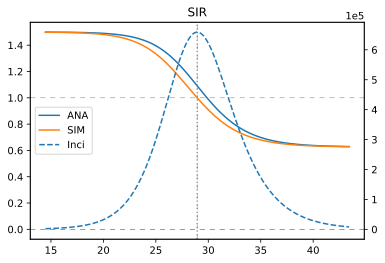

In [14]:
importlib.reload(f)

timeMaxMax = 500

beta = 1.5
gamma = 1

SIR = f.loadModel('SIR')
SIR['flows']['flows'][0]['parameter'] = str(beta)
SIR['flows']['flows'][1]['parameter'] = str(gamma)
f.writeModel(SIR, True, False)
SIR = f.loadModel('SIR', printText=False)

solution, t_span = f.solve(SIR, (0, 500), 100, True)
infsCurve = f.infCurveScaled(SIR, solution, t_span)
timeMax = t_span[f.find_nearest(infsCurve, 1)]

rtPrecision = 50 / timeMax
print(f'Rt subdivisions per unit of time: {rtPrecision}')

t_min = math.floor(timeMax / 2 * rtPrecision) / rtPrecision
t_max = math.ceil(3 * timeMax / 2 * rtPrecision) / rtPrecision

if timeMax >= timeMaxMax - 1:
    # If maximum is not reached, we don't want to analyse
    assert 1 == 0

rtCurves = \
    f.compare("SIR", (t_min, t_max), rtPrecision, R0=beta/gamma,
              plotANA=True, plotANA_v2=False,
              susceptibles=[0], infected=[1],
              plotBound=False)

plt.show()


In [45]:
# importlib.reload(f)

# if os.path.isfile('problems.txt'):
#     os.remove('problems.txt')

# rtPrecision = 5
# timeMaxMax = 500
# tested = None
# timeFrameMax = 100

# for R0 in tqdm(np.arange(1.5, 5 + .5, .5), desc='Values for R0'):
#     for gamma in tqdm(np.arange(.05, 1 + .05, .05), leave=False, desc=f'R0 = {R0}'):
#         beta = R0 * gamma
#         if True:  # always true
#             # print(beta, gamma, R0)
#             SIR = f.loadModel('SIR', printText=False)
#             SIR['flows']['flows'][0]['parameter'] = str(beta)
#             SIR['flows']['flows'][1]['parameter'] = str(gamma)
#             f.writeModel(SIR, True, False)
#             SIR = f.loadModel('SIR', printText=False)

#             solution, t_span = f.solve(SIR, (0, timeMaxMax), 100, False)
#             infsCurveScaled = f.infCurveScaled(SIR, solution, t_span)
#             timeMax = t_span[f.find_nearest(infsCurveScaled, 1)]

#             if timeMax >= timeMaxMax - 1:
#                 # If maximum is not reached, we don't want to analyse
#                 continue

#             # print(f'Time max infections: {timeMax}')

#             t_min = math.floor(max(
#                 timeMax / 2,
#                 timeMax - timeFrameMax // 2
#             ) * rtPrecision) / rtPrecision
#             t_max = math.ceil(min(
#                 3 * timeMax / 2,
#                 timeMax + timeFrameMax // 2
#             ) * rtPrecision) / rtPrecision

#             rtCurves = \
#                 f.compare("SIR", (t_min, t_max), 1, R0=R0,
#                           plotANA=True, plotANA_v2=True,
#                           susceptibles=[0], infected=[1],
#                           plotBound=True, supressGraph=True,
#                           useTqdm=False)

#             if type(tested) == type(None):
#                 tested = np.array([[beta, gamma]])
#             else:
#                 tested = np.append(tested, [[beta, gamma]], axis=0)

# plt.plot(tested[:, 0], tested[:, 1], 'o')
# plt.xlim(left=0)
# plt.ylim(bottom=0)
# plt.xlabel('$\\beta$')
# plt.ylabel('$\\gamma$')
# plt.show()


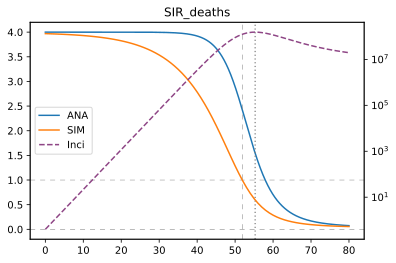

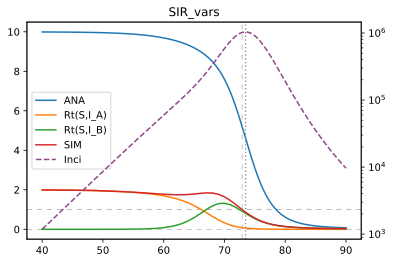

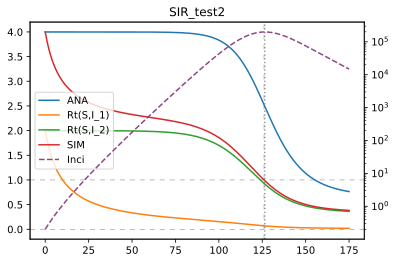

In [39]:
importlib.reload(f)

for name in ['SIR_deaths', 'SIR_vars', 'SIR_test2']:

    tupleTimes = {
        'SIR_deaths': (0, 80),
        'SIR_vars': (40, 90),
        'SIR_test2': (0, 175)
    }
    infectedTabs = {
        'SIR_deaths': [1],
        'SIR_vars': [1, 2],
        'SIR_test2': [1, 2]
    }
    r0Values = {
        'SIR_deaths': 4,
        'SIR_vars': 10,
        'SIR_test2': 4
    }

    rtCurves = \
        f.compare(name, tupleTimes[name], 1, R0=r0Values[name],
                plotANA=True, plotANA_v2=False,
                susceptibles=[0], infected=infectedTabs[name],
                plotBound=False)
    plt.show()


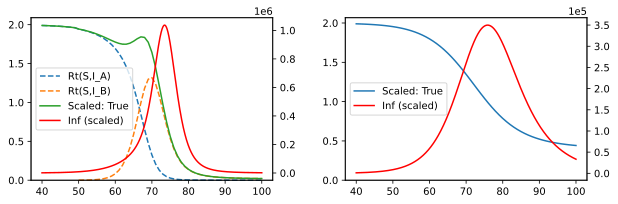

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

model, newModel, solution, t_span, values, _ = f.computeRt(
    'SIR_vars', (40, 100), sub_rt=1,
    scaledInfs=True, write=False, printText=False,
    printInit=False, printWarnings=False)

rt_times = np.array([key for key in values])
rt = np.zeros_like(rt_times, dtype='float64')
for rtNode in f.getRtNodes(f.mod(model, False, False)):
    rt_rtNode = np.array([values[key][rtNode] for key in values])

    idx = np.where(rt_rtNode > 0)
    if len(f.getRtNodes(f.mod(model, False, False))) > 1:
        ax1.plot(rt_times[idx], rt_rtNode[idx], label=rtNode, linestyle='--')
    rt += rt_rtNode


idx = np.where(rt > 0)
ax1.plot(rt_times[idx], rt[idx], label=f'Scaled: {True}')

ax1.set_ylim(bottom=0)

ax3 = ax1.twinx()
infsScaled = f.infCurve(model, solution, t_span)
ax3.plot(t_span, infsScaled, label='Inf (scaled)', c='Red')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()

ax1.legend(lines + lines2, labels + labels2, loc='center left')

# -------------------

model, newModel, solution, t_span, values, _ = f.computeRt(
    'SIR_vars_noB', (40, 100), sub_rt=1,
    scaledInfs=True, write=False, printText=False,
    printInit=False, printWarnings=False)

rt_times = np.array([key for key in values])
rt = np.zeros_like(rt_times, dtype='float64')
for rtNode in f.getRtNodes(f.mod(model, False, False)):
    rt_rtNode = np.array([values[key][rtNode] for key in values])

    idx = np.where(rt_rtNode > 0)
    # if len(f.getRtNodes(f.mod(model, False, False))) > 1 and len(idx) > 0:
    #     ax2.plot(rt_times[idx], rt_rtNode[idx], label=rtNode, linestyle='--')
    rt += rt_rtNode


idx = np.where(rt > 0)
ax2.plot(rt_times[idx], rt[idx], label=f'Scaled: {True}')

ax2.set_ylim(bottom=0)

ax4 = ax2.twinx()
infsScaled = f.infCurve(model, solution, t_span)
ax4.plot(t_span, infsScaled, label='Inf (scaled)', c='Red')

lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()

ax2.legend(lines + lines2, labels + labels2, loc='center left')

ax4.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))


plt.subplots_adjust(wspace=.3)

plt.show()


Model verified.
Writing model to file models/SIR_vars.json.
File name already exists.
Overwriting file.


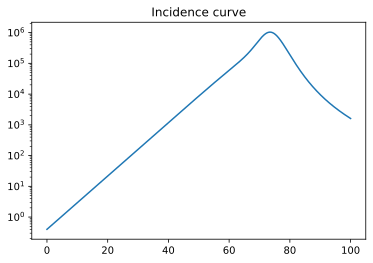

In [ ]:
model = f.loadModel('SIR_vars')

solution, t_span = f.solve(model, (0, 100), 100)

infsScaled = f.infCurve(model, solution, t_span)
plt.plot(t_span, infsScaled, label='Infections')
plt.title('Incidence curve')

plt.yscale('log')

plt.show()


In [47]:
importlib.reload(f)

for i, name in  \
    enumerate(['SIS_deaths', 'SIS_vacc',
               'SIRS_deaths', 'SIS_deaths_2',
               'SIR_vars', 'SIR_test2',
               'SIR_deaths', 'SIR_test', 'SIR',
               'SIR_test3', 'SIRS_vars']):

    measures = {
        'layerDistance': 1,
        'nodeDistance': 2,
        'varDistance': .25,
        'nullDistance': .8,
        'baseAngle': 10,
        'contactPositions': ("2/5", "3/5"),
        'scale': 1 if name != 'SIRS_vars' else .6
    }

    # f.printModel(f.loadModel(name, True, False))

    f.createLaTeX(f.loadModel(name, True, False), **measures)

    f.createLaTeX(f.mod(f.loadModel(name, True, False),
                        overWrite=True), **measures)


\label{SIS_deaths_Tikz}
\label{SIS_deaths_mod_Tikz}
\label{SIS_vacc_Tikz}
\label{SIS_vacc_mod_Tikz}
\label{SIRS_deaths_Tikz}
\label{SIRS_deaths_mod_Tikz}
\label{SIS_deaths_2_Tikz}
\label{SIS_deaths_2_mod_Tikz}
\label{SIR_vars_Tikz}
\label{SIR_vars_mod_Tikz}
\label{SIR_test2_Tikz}
\label{SIR_test2_mod_Tikz}
\label{SIR_deaths_Tikz}
\label{SIR_deaths_mod_Tikz}
\label{SIR_test_Tikz}
\label{SIR_test_mod_Tikz}
\label{SIR_Tikz}
\label{SIR_mod_Tikz}
\label{SIR_test3_Tikz}
\label{SIR_test3_mod_Tikz}
\label{SIRS_vars_Tikz}
\label{SIRS_vars_mod_Tikz}
